In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

import os 

In [2]:
data=pd.read_csv("road-accidents.csv")
data.head()
for i in data:
    i=[0,1,2,3,4,5,6,7,8]
data1=data.drop(i)
data1



,##### LICENSE #####
9,Alabama|18.8|39|30|80
10,Alaska|18.1|41|25|94
11,Arizona|18.6|35|28|96
12,Arkansas|22.4|18|26|95
13,California|12|35|28|89
14,Colorado|13.6|37|28|95
15,Connecticut|10.8|46|36|82
16,Delaware|16.2|38|30|99
17,District of Columbia|5.9|34|27|100
18,Florida|17.9|21|29|94


In [3]:
data2=pd.read_csv("miles-driven.csv")
data2

,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784
5,Colorado|46606
6,Connecticut|31197
7,Delaware|9028
8,District of Columbia|3568
9,Florida|191855


In [4]:
data2 = data2["state|million_miles_annually"].str.split(pat='|',expand=True)


In [5]:

data2.rename(columns={0: 'state', 1: 'million_miles_annually'}, inplace=True)
data2

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


In [6]:
data1.rename(columns={"##### LICENSE #####": 'state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'}, inplace=True)
data1

,state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time
9,Alabama|18.8|39|30|80
10,Alaska|18.1|41|25|94
11,Arizona|18.6|35|28|96
12,Arkansas|22.4|18|26|95
13,California|12|35|28|89
14,Colorado|13.6|37|28|95
15,Connecticut|10.8|46|36|82
16,Delaware|16.2|38|30|99
17,District of Columbia|5.9|34|27|100
18,Florida|17.9|21|29|94


In [7]:
data1 = data1["state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time"].str.split(pat='|',expand=True)

In [8]:
data1.rename(columns={0: 'state', 1: 'drvr_fatl_col_bmiles', 2:"perc_fatl_speed" , 3:"perc_fatl_alcohol" , 4:"perc_fatl_1st_time"}, inplace=True)


In [9]:
data1

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
9,Alabama,18.8,39,30,80
10,Alaska,18.1,41,25,94
11,Arizona,18.6,35,28,96
12,Arkansas,22.4,18,26,95
13,California,12,35,28,89
14,Colorado,13.6,37,28,95
15,Connecticut,10.8,46,36,82
16,Delaware,16.2,38,30,99
17,District of Columbia,5.9,34,27,100
18,Florida,17.9,21,29,94


In [10]:
data3=pd.merge(data2,data1)
data3

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12,35,28,89
5,Colorado,46606,13.6,37,28,95
6,Connecticut,31197,10.8,46,36,82
7,Delaware,9028,16.2,38,30,99
8,District of Columbia,3568,5.9,34,27,100
9,Florida,191855,17.9,21,29,94


In [11]:

data3 = data3.astype({'million_miles_annually': 'int64', 'drvr_fatl_col_bmiles': 'float64','perc_fatl_speed': 'int64', 'perc_fatl_alcohol': 'int64', 'perc_fatl_1st_time': 'int64'})

In [12]:
data3

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12.0,35,28,89
5,Colorado,46606,13.6,37,28,95
6,Connecticut,31197,10.8,46,36,82
7,Delaware,9028,16.2,38,30,99
8,District of Columbia,3568,5.9,34,27,100
9,Florida,191855,17.9,21,29,94


In [13]:
data4=data3.head(11)
data4

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12.0,35,28,89
5,Colorado,46606,13.6,37,28,95
6,Connecticut,31197,10.8,46,36,82
7,Delaware,9028,16.2,38,30,99
8,District of Columbia,3568,5.9,34,27,100
9,Florida,191855,17.9,21,29,94


Text(0, 0.5, 'STATE')

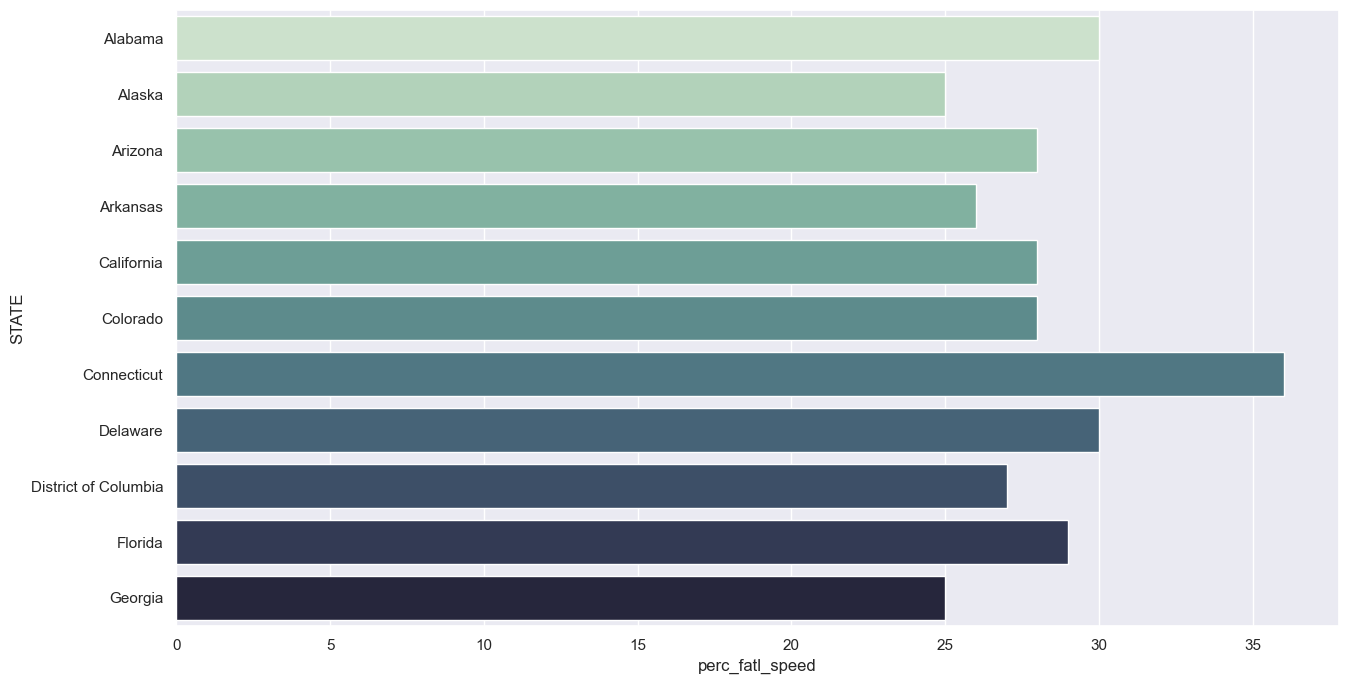

In [14]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
L1=data4["state"]
L2=data4["perc_fatl_alcohol"]
sns.barplot(data=data4,x=L2,y=L1,palette="ch:s=.2,rot=-.5")
plt.xlabel("perc_fatl_speed")
plt.ylabel("STATE")

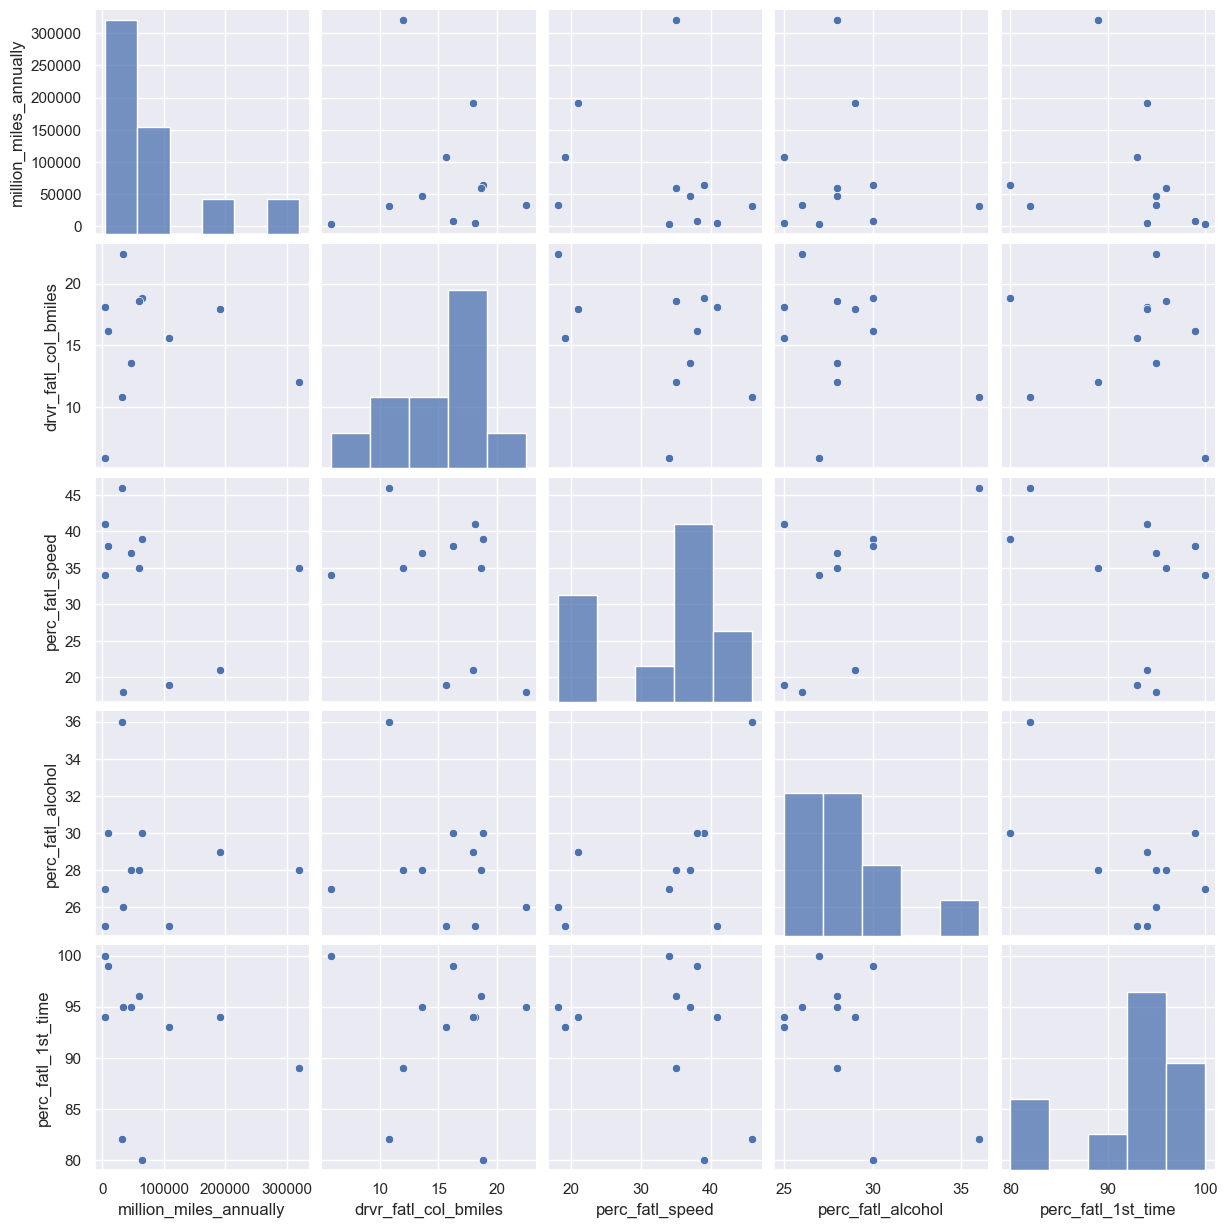

In [15]:
sns.pairplot(data4)

In [16]:
data3.corr()

,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
million_miles_annually,1.000000,-0.077133,-0.043199,-0.034561,-0.128928
drvr_fatl_col_bmiles,-0.077133,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.043199,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,-0.034561,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.128928,-0.017942,0.014066,-0.245455,1.000000


In [17]:
features = data4.drop(['state','drvr_fatl_col_bmiles'], axis =1)
target =  data4['drvr_fatl_col_bmiles']

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(features, target)


LinearRegression()

In [19]:
coef = linear_reg.coef_
coef

array([-1.39064416e-05, -2.29022612e-01, -4.36454774e-01, -3.27528796e-01])

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

In [21]:
pca = PCA()
pca.fit(df_scaled)

PCA()

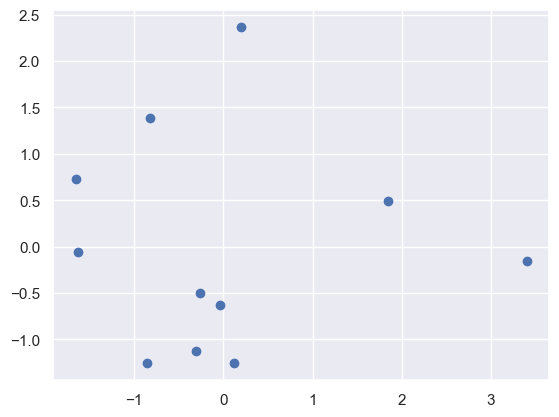

In [22]:
pca = PCA(n_components=2)
pca_comps = pca.fit_transform(df_scaled)

pca_comp1 = pca_comps[:,0]
pca_comp2 = pca_comps[:,1]

plt.scatter(pca_comp1,pca_comp2)
plt.show()

C:\Users\GOKUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


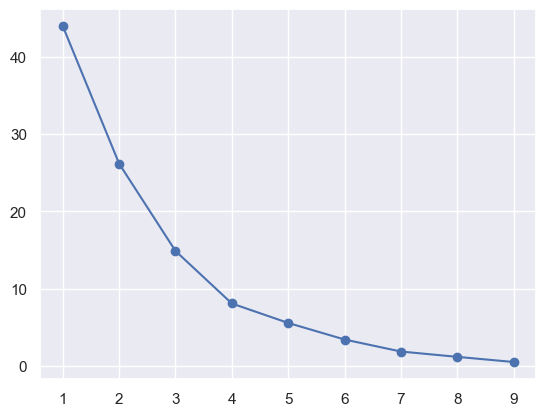

In [23]:
inertia = []
for k in range(1, 10):
    
    km = KMeans(n_clusters= k, random_state=8)

    km.fit(df_scaled)

    inertia.append(km.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.show()

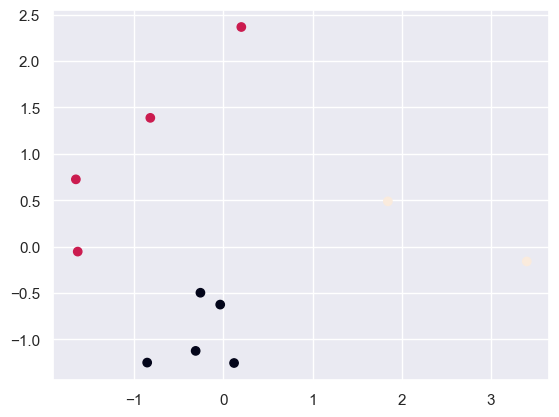

In [24]:
km = KMeans(n_clusters = 3, random_state=8)
km.fit(df_scaled)

plt.scatter(pca_comps[:, 0], pca_comps[:, 1], c=km.labels_)
plt.show()